In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_table('people.txt')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [6]:
rule1=df['Age'].apply(lambda x:True if x>=0 and x<=150 else False)
rule1

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [7]:
rule2=df.apply(lambda x: True if x.Age>x.yearsmarried else False, axis=1)
rule2

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [8]:
rule3=df.apply(lambda x: True if x.status=="married" or x.status=="single" or x.status=="widowed" else False, axis=1)
rule3 

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [9]:
rule4=df.apply(lambda x: True if(x.Age<18 and x.agegroup=="child")or 
              (x.Age<65 and x.agegroup=="adult")or
              (x.Age>65 and x.agegroup=="elderly") else False, axis=1)
rule4

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [10]:
rules=pd.DataFrame({"Rule 1":rule1,"Rule 2":rule2, "Rule 3":rule3, "Rule 4":rule4})
rules

,Rule 1,Rule 2,Rule 3,Rule 4
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,False,True,True,True
4,True,True,True,False


In [11]:
rules.astype(int)

,Rule 1,Rule 2,Rule 3,Rule 4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


In [12]:
print("numbers of rule violated : ",len (rules)-rules["Rule 1"].sum())
print("count of both \n", rules["Rule 1"].value_counts())

numbers of rule violated :  1
count of both 
 True     4
False    1
Name: Rule 1, dtype: int64


In [64]:
print("numbers of rule violated : ",len (rules)-rules["Rule 2"].sum())
print("count of both \n", rules["Rule 2"].value_counts())

numbers of rule violated :  1
count of both 
 True     4
False    1
Name: Rule 2, dtype: int64


In [65]:
print("numbers of rule violated : ",len (rules)-rules["Rule 3"].sum())
print("count of both \n", rules["Rule 3"].value_counts())

numbers of rule violated :  0
count of both 
 True    5
Name: Rule 3, dtype: int64


In [66]:
print("numbers of rule violated : ",len (rules)-rules["Rule 4"].sum())
print("count of both \n", rules["Rule 4"].value_counts())

numbers of rule violated :  1
count of both 
 True     4
False    1
Name: Rule 4, dtype: int64


In [67]:
import matplotlib.pyplot as plt
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

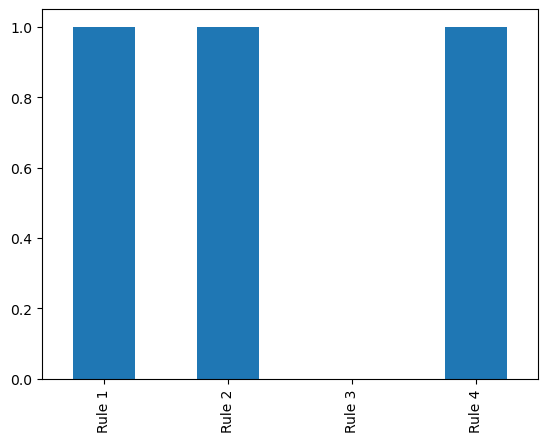

In [68]:
rules.apply(lambda x:len(x)-x.sum()).plot(kind='bar')
plt.xlabel="rules"
plt.ylabel="number of records that violates the rule"